# 편의점 지수 PRJ
1. 지역명 전처리
2. 편의점 종류 분류
3. 지역별 / 종류별 df 만들기
4. 블록 맵 만들기

In [1]:
import pandas as pd
import numpy as np
import re
from plotnine import *
import folium

In [2]:
# 2018 상권데이터 불러오기
shop1 = pd.read_csv('data/201806_01.csv')
shop2 = pd.read_csv('data/201806_02.csv')
shop3 = pd.read_csv('data/201806_03.csv')
shop4 = pd.read_csv('data/201806_04.csv')

C:\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (35) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (35,36) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
# 합치고 편의점을 뽑으려니 렉이 걸린다 ;-; 하나씩 해주자
store1 = shop1[shop1['상권업종소분류명'].str.contains('편의점')]
store2 = shop2[shop2['상권업종소분류명'].str.contains('편의점')]
store3 = shop3[shop3['상권업종소분류명'].str.contains('편의점')]
store4 = shop4[shop4['상권업종소분류명'].str.contains('편의점')]

In [4]:
# 편의점 데이터 합치기
frames = [store1, store2, store3, store4]
store_sum = pd.concat(frames)

In [5]:
store_sum

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
379,22143908,코리아세븐하단제휴점,NaN,D,소매,D03,종합소매점,D03A01,편의점,G47122,...,2.638010e+24,NaN,부산광역시 사하구 낙동대로 474,604020,49325.0,NaN,1,NaN,128.968208,35.107159
528,22565484,GS25해운리베라,NaN,D,소매,D03,종합소매점,D03A01,편의점,G47122,...,2.635010e+24,NaN,부산광역시 해운대구 구남로29번길 26,612010,48095.0,NaN,1,NaN,129.161980,35.162279
534,22557422,GS,천호삼성점,D,소매,D03,종합소매점,D03A01,편의점,G47122,...,1.174010e+24,NaN,서울특별시 강동구 성안로25길 21,134020,5338.0,NaN,1,NaN,127.134360,37.538247
671,23341703,미니스톱반송삼한점,반송삼한점,D,소매,D03,종합소매점,D03A01,편의점,G47122,...,2.635010e+24,NaN,부산광역시 해운대구 신반송로 168,612080,48011.0,NaN,1,NaN,129.161280,35.228781
765,25305326,세븐일레븐대치코스모스점B,NaN,D,소매,D03,종합소매점,D03A01,편의점,G47122,...,1.168010e+24,NaN,서울특별시 강남구 영동대로86길 10,135280,6174.0,NaN,1,NaN,127.064890,37.507793
887,25414903,GS25,학장공단점,D,소매,D03,종합소매점,D03A01,편의점,G47122,...,2.653010e+24,동호기계,부산광역시 사상구 가야대로176번길 24,617844,47021.0,NaN,1,NaN,128.991098,35.148573
944,25471219,CU역삼달샘점,역삼달샘점,D,소매,D03,종합소매점,D03A01,편의점,G47122,...,1.168010e+24,NaN,서울특별시 강남구 테헤란로19길 29,135080,6131.0,NaN,1,NaN,127.032799,37.501885
945,25409751,GS25,자양한강점,D,소매,D03,종합소매점,D03A01,편의점,G47122,...,1.121510e+24,NaN,서울특별시 광진구 능동로3길 54,143190,5084.0,NaN,1,NaN,127.064504,37.534218
1025,2933828,GS25안암학사,NaN,D,소매,D03,종합소매점,D03A01,편의점,G47122,...,1.129010e+24,NaN,서울특별시 성북구 인촌로 105,136701,2842.0,NaN,1,NaN,127.030958,37.586488
1036,25560317,GS25당리행운점,당리행운점,D,소매,D03,종합소매점,D03A01,편의점,G47122,...,2.638010e+24,NaN,부산광역시 사하구 낙동대로450번길 2,604829,49326.0,NaN,1,NaN,128.969877,35.105424


C:\Anaconda3\lib\site-packages\plotnine\utils.py:281: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  ndistinct = ids.apply(len_unique, axis=0).as_matrix()
C:\Anaconda3\lib\site-packages\pandas\core\generic.py:4384: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  object.__getattribute__(self, name)
C:\Anaconda3\lib\site-packages\pandas\core\generic.py:4385: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  return object.__setattr__(self, name, value)


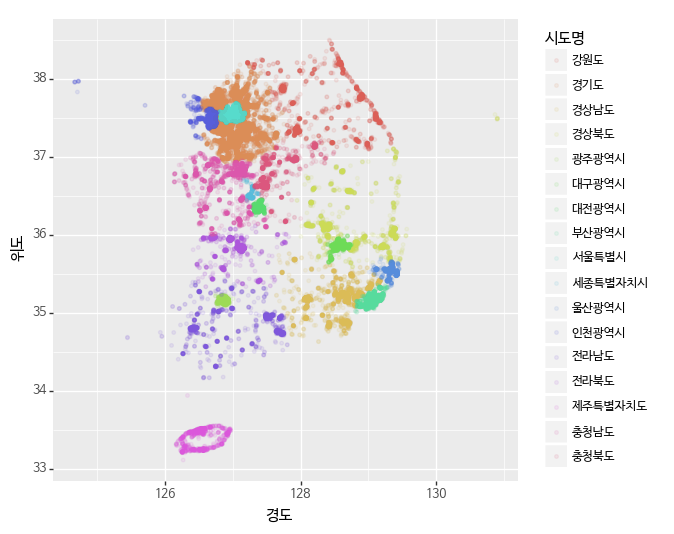

<ggplot: (89668118)>

In [6]:
# 전 지역 데이터가 있는지 찍어보자~ 다있는 것 같당
(ggplot(store_sum)
 + aes(x='경도', y='위도', color='시도명')
 + geom_point(size=1, alpha=0.1)
 + theme(text=element_text(family='NanumBarunGothic'),
        figure_size=(6, 6))
)

In [90]:
# 시도명과 시군구명을 합쳐서 지역칼럼만들기
store_sum['지역'] = store_sum['시도명'] + ' ' + store_sum['시군구명']

In [129]:
# 지역칼럼 넣어줌
store = store_sum[['상호명', '지역', '시군구코드', '경도', '위도']]
store.head(2)

,상호명,지역,시군구코드,경도,위도
379,코리아세븐하단제휴점,부산광역시 사하구,26380,128.968208,35.107159
528,GS25해운리베라,부산광역시 해운대구,26350,129.161980,35.162279


# 1. 지역명 전처리

In [130]:
store.tail()

,상호명,지역,시군구코드,경도,위도
679984,CU,전라북도 전주시 덕진구,45113,127.133156,35.878444
680091,세븐일레븐,전라남도 여수시,46130,127.658265,34.757472
680248,세븐일레븐,전라남도 여수시,46130,127.741365,34.737393
680294,미니스톱,경상남도 김해시,48250,128.915462,35.240697
680446,GS25,경상남도 창원시 성산구,48123,128.600213,35.168889


### 지역을 보니...! 시 옆에 구도 따라온다.  
도는 d1으로, 시는 d2로 칼럼을 저장해준 뒤 지역2로 만들어주기.

In [131]:
store['d1'] = store['지역'].apply(lambda do_si : do_si.split(' ')[0])
store['d2'] = store['지역'].apply(lambda do_si : do_si.split(' ')[1])
store['지역2'] = store['d1'] + ' ' + store2['d2']

store.tail()

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexi

,상호명,지역,시군구코드,경도,위도,d1,d2,지역2
679984,CU,전라북도 전주시 덕진구,45113,127.133156,35.878444,전라북도,전주시,전라북도 전주시
680091,세븐일레븐,전라남도 여수시,46130,127.658265,34.757472,전라남도,여수시,전라남도 여수시
680248,세븐일레븐,전라남도 여수시,46130,127.741365,34.737393,전라남도,여수시,전라남도 여수시
680294,미니스톱,경상남도 김해시,48250,128.915462,35.240697,경상남도,김해시,경상남도 김해시
680446,GS25,경상남도 창원시 성산구,48123,128.600213,35.168889,경상남도,창원시,경상남도 창원시


In [132]:
store = store[['상호명', '지역2', 'd1', 'd2', '시군구코드', '경도', '위도']]
store.tail()

,상호명,지역2,d1,d2,시군구코드,경도,위도
679984,CU,전라북도 전주시,전라북도,전주시,45113,127.133156,35.878444
680091,세븐일레븐,전라남도 여수시,전라남도,여수시,46130,127.658265,34.757472
680248,세븐일레븐,전라남도 여수시,전라남도,여수시,46130,127.741365,34.737393
680294,미니스톱,경상남도 김해시,경상남도,김해시,48250,128.915462,35.240697
680446,GS25,경상남도 창원시,경상남도,창원시,48123,128.600213,35.168889


# 2. 편의점 종류 분류

In [133]:
gs = store[(store['상호명'].str.contains(r'GS25|gs25|지에스이십오|^GS$|gs이십오|지에스(25)?|GS[가-힣]|[가-힣]GS'))]
cu = store[(store['상호명'].str.contains(r'^씨유|CU|\bcu'))]
seven = store[(store['상호명'].str.contains(r'세븐|seven|7|Seven|SEVEN'))]
mini = store[(store['상호명'].str.contains(r'미니|mini|MINI'))]
emart =store[(store['상호명'].str.contains(r'^[eE]-?mart|^[eE]-?MART|^이마트|클루이마트|이마트24|위드미|withme'))]

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  """Entry point for launching an IPython kernel.


In [134]:
gs['편의점'] = 'GS25'
cu['편의점'] = 'CU'
seven['편의점'] = '7ELEVEN'
mini['편의점'] = 'MINISTOP'
emart['편의점'] = 'EMART'

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexi

In [135]:
gs = gs[['상호명', '편의점', '지역2', 'd1', 'd2', '시군구코드', '경도', '위도']]
cu = cu[['상호명', '편의점', '지역2', 'd1', 'd2', '시군구코드', '경도', '위도']]
seven = seven[['상호명', '편의점', '지역2', 'd1', 'd2', '시군구코드', '경도', '위도']]
mini = mini[['상호명', '편의점', '지역2', 'd1', 'd2', '시군구코드', '경도', '위도']]
emart = emart[['상호명', '편의점', '지역2', 'd1', 'd2', '시군구코드', '경도', '위도']]

In [136]:
frames = [gs, cu, seven, mini, emart]
gmap = pd.concat(frames)
gmap.tail()

,상호명,편의점,지역2,d1,d2,시군구코드,경도,위도
667768,이마트,EMART,경상북도 상주시,경상북도,상주시,47250,128.151035,36.410005
667776,이마트,EMART,경상남도 김해시,경상남도,김해시,48250,128.904998,35.253232
671427,이마트24남악원룸점,EMART,전라남도 무안군,전라남도,무안군,46840,126.473411,34.810732
672931,이마트24보령우연플로라점,EMART,충청남도 보령시,충청남도,보령시,44180,126.512590,36.313145
679428,이마트,EMART,충청남도 당진시,충청남도,당진시,44270,126.637774,36.885057


In [100]:
# gs.to_csv('data/gs.csv', index=False)
# cu.to_csv('data/cu.csv', index=False)
# seven.to_csv('data/seven.csv', index=False)
# mini.to_csv('data/mini.csv', index=False)
# emart.to_csv('data/emart.csv', index=False)

C:\Anaconda3\lib\site-packages\plotnine\utils.py:281: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  ndistinct = ids.apply(len_unique, axis=0).as_matrix()
C:\Anaconda3\lib\site-packages\pandas\core\generic.py:4384: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  object.__getattribute__(self, name)
C:\Anaconda3\lib\site-packages\pandas\core\generic.py:4385: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  return object.__setattr__(self, name, value)


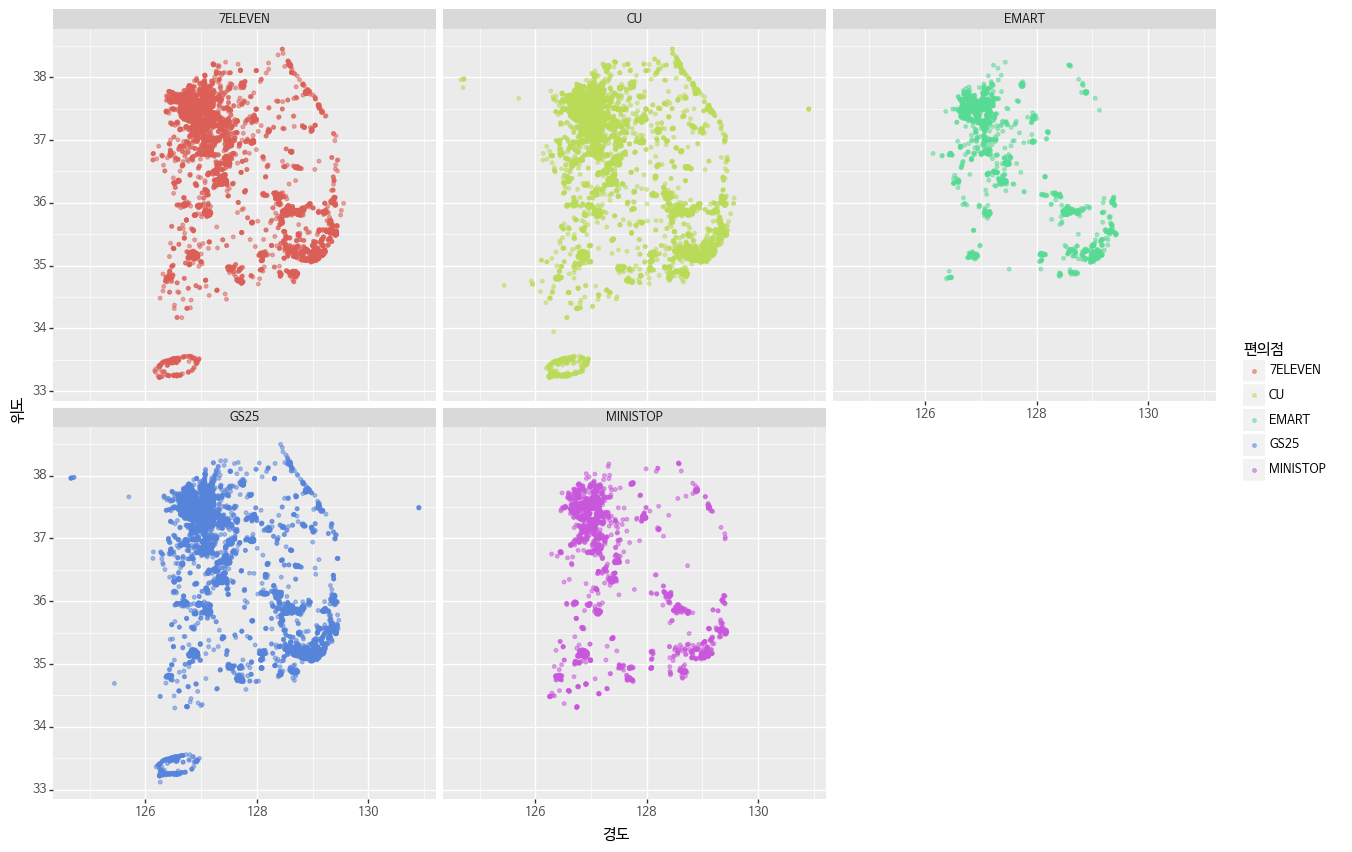

<ggplot: (-9223372036764811348)>

In [101]:
(ggplot(gmap)
 + aes(x='경도', y='위도', color='편의점')
 + geom_point(size=1, alpha=0.5)
 + facet_wrap('편의점')
 + theme(text=element_text(family='NanumBarunGothic'),
        figure_size=(15, 10))
)

# 3. 지역별로 df 만들기
지역2 기준으로 편의점 종류별 합 df를 만듬

In [137]:
gs_sum = gs['지역2'].value_counts()
cu_sum = cu['지역2'].value_counts()
seven_sum = seven['지역2'].value_counts()
mini_sum = mini['지역2'].value_counts()
emart_sum = emart['지역2'].value_counts()

In [139]:
# 빈 값은 0으로 대체해주기
convenience_store_df = pd.DataFrame({'GS25': gs_sum, 'CU': cu_sum, '7ELEVEN': seven_sum, 'MINISTOP': mini_sum, 'EMART': emart_sum}).fillna(0)
convenience_store_df

,GS25,CU,7ELEVEN,MINISTOP,EMART
강원도 강릉시,78.0,74.0,70.0,23.0,16.0
강원도 고성군,8.0,15.0,8.0,0.0,0.0
강원도 동해시,32.0,44.0,15.0,16.0,1.0
강원도 삼척시,21.0,36.0,13.0,4.0,0.0
강원도 속초시,33.0,40.0,26.0,4.0,5.0
강원도 양구군,3.0,10.0,4.0,1.0,0.0
강원도 양양군,14.0,21.0,11.0,1.0,1.0
강원도 영월군,17.0,16.0,3.0,0.0,0.0
강원도 원주시,111.0,104.0,88.0,50.0,24.0
강원도 인제군,12.0,17.0,6.0,3.0,0.0


In [140]:
# 지역별 편의점 수의 합을 total 칼럼에 저장
convenience_store_df['total'] = convenience_store_df.sum(axis=1)
convenience_store_df.head(10)

,GS25,CU,7ELEVEN,MINISTOP,EMART,total
강원도 강릉시,78.0,74.0,70.0,23.0,16.0,261.0
강원도 고성군,8.0,15.0,8.0,0.0,0.0,31.0
강원도 동해시,32.0,44.0,15.0,16.0,1.0,108.0
강원도 삼척시,21.0,36.0,13.0,4.0,0.0,74.0
강원도 속초시,33.0,40.0,26.0,4.0,5.0,108.0
강원도 양구군,3.0,10.0,4.0,1.0,0.0,18.0
강원도 양양군,14.0,21.0,11.0,1.0,1.0,48.0
강원도 영월군,17.0,16.0,3.0,0.0,0.0,36.0
강원도 원주시,111.0,104.0,88.0,50.0,24.0,377.0
강원도 인제군,12.0,17.0,6.0,3.0,0.0,38.0


In [145]:
convenience_store_df = convenience_store_df.astype(int)
convenience_store_df.head()

,GS25,CU,7ELEVEN,MINISTOP,EMART,total
강원도 강릉시,78,74,70,23,16,261
강원도 고성군,8,15,8,0,0,31
강원도 동해시,32,44,15,16,1,108
강원도 삼척시,21,36,13,4,0,74
강원도 속초시,33,40,26,4,5,108


## (상관계수 확인해보기)

In [110]:
from matplotlib import pyplot as plt
from matplotlib import rcParams, style
style.use('ggplot')
rcParams['font.size'] = 12

전국 편의점은 GS25 > CU > 7ELEVEN > MINISTOP > EMART 순으로 많다.


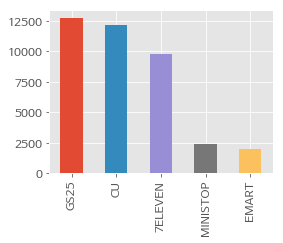

In [111]:
plt.figure(figsize=(4, 3))
convenience_store_df.sum(axis=0).iloc[:5].plot(kind='bar')
print ("전국 편의점은 GS25 > CU > 7ELEVEN > MINISTOP > EMART 순으로 많다.")

In [112]:
import scipy.stats

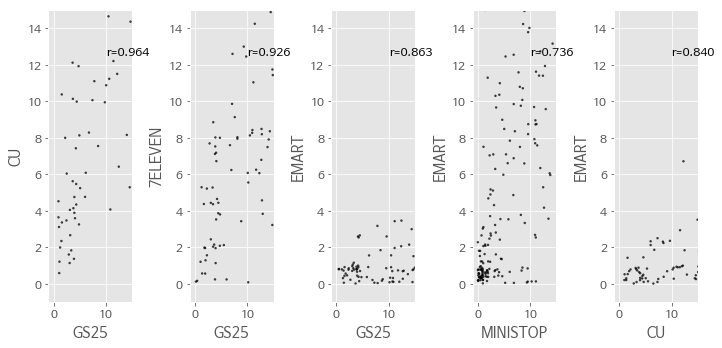

In [113]:
fig = plt.figure(figsize=(10,5))

def plot_nstores(b1, b2, label1, label2):
    plt.scatter(convenience_store_df[b1] + np.random.random(len(convenience_store_df)),
                convenience_store_df[b2] + np.random.random(len(convenience_store_df)),
                edgecolor='none', alpha=0.75, s=6, c='black')
    plt.xlim(-1, 15)
    plt.ylim(-1, 15)
    plt.xlabel(label1)
    plt.ylabel(label2)
    
    r = scipy.stats.pearsonr(convenience_store_df[b1], convenience_store_df[b2])
    plt.annotate('r={:.3f}'.format(r[0]), (10, 12.5))

ax = fig.add_subplot(1, 5, 1)
plot_nstores('GS25', 'CU', 'GS25', 'CU')

ax = fig.add_subplot(1, 5, 2)
plot_nstores('GS25', '7ELEVEN', 'GS25', '7ELEVEN')

ax = fig.add_subplot(1, 5, 3)
plot_nstores('GS25', 'EMART', 'GS25', 'EMART')

ax = fig.add_subplot(1, 5, 4)
plot_nstores('MINISTOP', 'EMART', 'MINISTOP', 'EMART')

ax = fig.add_subplot(1, 5, 5)
plot_nstores('CU', 'EMART', 'CU', 'EMART')

plt.tight_layout()

Text(0,0.5,'Cumulative fraction')

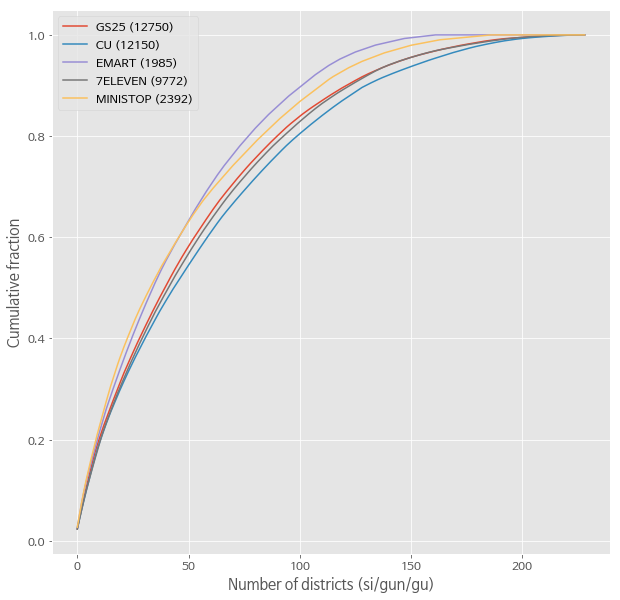

In [114]:
plt.figure(figsize=(10, 10))
for col, label in [('GS25', 'GS25'), ('CU', 'CU'), ('EMART', "EMART"), ('7ELEVEN', "7ELEVEN"), ('MINISTOP',"MINISTOP") ]:
    cumulv = np.cumsum(sorted(convenience_store_df[col], reverse=True)) / convenience_store_df[col].sum()
    plt.plot(cumulv, label='{} ({})'.format(label, int(convenience_store_df[col].sum())))
plt.legend(loc='best')
plt.xlabel('Number of districts (si/gun/gu)')
plt.ylabel('Cumulative fraction')

# 4. 블록 맵 만들기

In [115]:
blockpositions = pd.read_csv('data/blockpositions.csv', names=range(15))
blockpositions.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,NaN,NaN,NaN,NaN,NaN,NaN,철원,화천,양구,고성(강원),NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,서울도봉,서울노원,연천,포천,속초,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,파주,고양,서울강북,서울성북,동두천,양주,인제,양양,NaN,NaN,NaN,NaN
3,NaN,강화,김포,광명,서울은평,서울서대문,서울종로,의정부,남양주,가평,춘천,NaN,NaN,NaN,NaN
4,NaN,인천서구,부천,안양,서울강서,서울마포,서울중구,서울동대문,서울중랑,구리,홍천,강릉,NaN,NaN,NaN


### 지역2로 인덱스로 들어가 있는 상태! d1과 d2를 다시 추가해주자. 

In [117]:
convenience_store_df

,GS25,CU,7ELEVEN,MINISTOP,EMART,total
강원도 강릉시,78,74,70,23,16,261
강원도 고성군,8,15,8,0,0,31
강원도 동해시,32,44,15,16,1,108
강원도 삼척시,21,36,13,4,0,74
강원도 속초시,33,40,26,4,5,108
강원도 양구군,3,10,4,1,0,18
강원도 양양군,14,21,11,1,1,48
강원도 영월군,17,16,3,0,0,36
강원도 원주시,111,104,88,50,24,377
강원도 인제군,12,17,6,3,0,38


In [147]:
convenience_store_df['지역'] = convenience_store_df.index
convenience_store_df.head()

,GS25,CU,7ELEVEN,MINISTOP,EMART,total,지역
강원도 강릉시,78,74,70,23,16,261,강원도 강릉시
강원도 고성군,8,15,8,0,0,31,강원도 고성군
강원도 동해시,32,44,15,16,1,108,강원도 동해시
강원도 삼척시,21,36,13,4,0,74,강원도 삼척시
강원도 속초시,33,40,26,4,5,108,강원도 속초시


In [148]:
convenience_store_df['d1'] = convenience_store_df['지역'].apply(lambda do_si : do_si.split(' ')[0])
convenience_store_df['d2'] = convenience_store_df['지역'].apply(lambda do_si : do_si.split(' ')[1])
convenience_store_df.tail()

,GS25,CU,7ELEVEN,MINISTOP,EMART,total,지역,d1,d2
충청북도 제천시,37,43,26,6,7,119,충청북도 제천시,충청북도,제천시
충청북도 증평군,16,12,9,1,0,38,충청북도 증평군,충청북도,증평군
충청북도 진천군,20,21,33,3,1,78,충청북도 진천군,충청북도,진천군
충청북도 청주시,235,220,156,39,49,699,충청북도 청주시,충청북도,청주시
충청북도 충주시,55,79,51,1,15,201,충청북도 충주시,충청북도,충주시


In [150]:
convenience_store_df = convenience_store_df[['d1', 'd2', 'GS25', 'CU', '7ELEVEN', 'MINISTOP', 'EMART']]
convenience_store_df

,d1,d2,GS25,CU,7ELEVEN,MINISTOP,EMART
강원도 강릉시,강원도,강릉시,78,74,70,23,16
강원도 고성군,강원도,고성군,8,15,8,0,0
강원도 동해시,강원도,동해시,32,44,15,16,1
강원도 삼척시,강원도,삼척시,21,36,13,4,0
강원도 속초시,강원도,속초시,33,40,26,4,5
강원도 양구군,강원도,양구군,3,10,4,1,0
강원도 양양군,강원도,양양군,14,21,11,1,1
강원도 영월군,강원도,영월군,17,16,3,0,0
강원도 원주시,강원도,원주시,111,104,88,50,24
강원도 인제군,강원도,인제군,12,17,6,3,0


In [151]:
# convenience_store_df['C7ME'] = convenience_store_df['CU'] + convenience_store_df['7ELEVEN'] + convenience_store_df['MINISTOP'] + convenience_store_df['EMART']
# convenience_store_df['편의점지수'] = convenience_store_df['C7ME'] / convenience_store_df['GS25']
# convenience_store_df = convenience_store_df.sort('편의점지수', ascending=False)
# convenience_store_df.head()

AttributeError: 'DataFrame' object has no attribute 'sort'

In [120]:
# def short_distr(name):
#     wide, narrow = name.split()
#     if narrow.endswith('구'):
#         return wide[:2] + (narrow[:-1] if len(narrow) > 2 else narrow)
#     elif narrow == '고성군': # 고성군은 강원도, 경상남도에 있다.
#         return '고성({})'.format({'강원도': '강원', '경상남도': '경남'}[wide])
#     else:
#         return narrow[:-1]

# convenience_store_df['shortname'] = list(map(short_distr, convenience_store_df.index))
# convenience_store_df.head()

TypeError: 'Map' object is not callable

------------------------------------------